In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To use statistical functions
import scipy.stats as stats


In [2]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\Loan_Delinquent_Dataset (1).csv")

In [3]:
loan = data.copy()

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


In [5]:
loan["term"] = loan["term"].astype("category")
loan["gender"] = loan["gender"].astype("category")
loan["purpose"] = loan["purpose"].astype("category")
loan["home_ownership"] = loan["home_ownership"].astype("category")
loan["age"] = loan["age"].astype("category")
loan["FICO"] = loan["FICO"].astype("category")
loan["isDelinquent"] = loan["isDelinquent"].astype("category")

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              11548 non-null  int64   
 1   isDelinquent    11548 non-null  category
 2   term            11548 non-null  category
 3   gender          11548 non-null  category
 4   purpose         11548 non-null  category
 5   home_ownership  11548 non-null  category
 6   age             11548 non-null  category
 7   FICO            11548 non-null  category
dtypes: category(7), int64(1)
memory usage: 170.4 KB


In [7]:
# let's check for duplicate values in the data
loan.duplicated().sum()

0

In [8]:
# let's check for missing values in the data
loan.isnull().sum()

ID                0
isDelinquent      0
term              0
gender            0
purpose           0
home_ownership    0
age               0
FICO              0
dtype: int64

In [9]:
# let's view the statistical summary of the numerical columns in the data
loan.describe(include="all")

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
count,11548.000000,11548.0,11548,11548,11548,11548,11548,11548
unique,NaN,2.0,2,2,7,3,2,2
top,NaN,1.0,36 months,Male,House,Mortgage,20-25,300-500
freq,NaN,7721.0,10589,6555,6892,5461,5888,6370
mean,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3333.764789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2887.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5774.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8661.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations

Most of the customers are loan delinquent(1)
Most of the loans are for a 36-month term loan
More males have applied for loans than females
Most loan applications are for house loans
Most customers have either mortgaged their houses
Mostly customers in the age group 20-25 have applied for a loan
Most customers have a FICO score between 300 and 500

Data Pre-Processing

In [10]:
# checking for unique values in the ID column
loan["ID"].nunique()

11548

In [11]:
loan.drop(["ID"], axis=1, inplace=True)

In [12]:
# checking unique value in purpose
loan["purpose"].unique()

['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']

In [13]:
# We can merge the purpose -  'other' and 'Other' together
loan["purpose"].replace("other", "Other", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\3903557162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["purpose"].replace("other", "Other", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23080\3903557162.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  loan["purpose"].replace("other", "Other",

EDA
Univariate analysis

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observations on isDelinquent

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


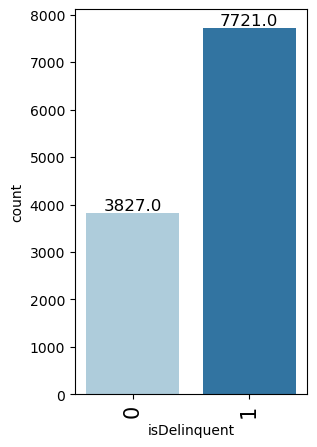

In [15]:
labeled_barplot(loan, "isDelinquent")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


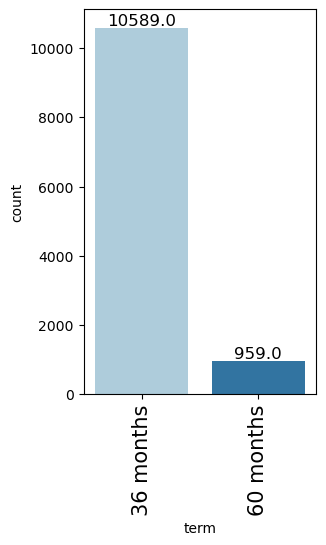

In [16]:
labeled_barplot(loan, "term")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


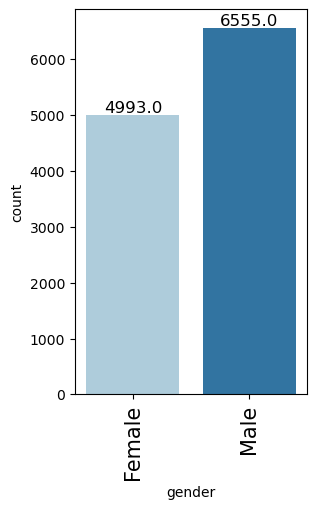

In [17]:
labeled_barplot(loan, "gender")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


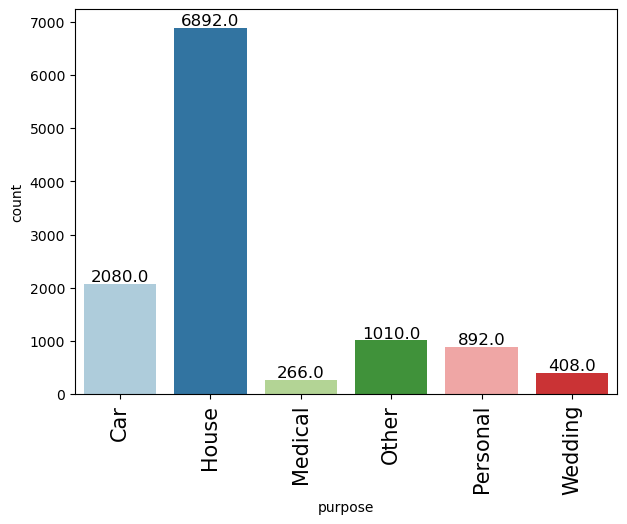

In [18]:
labeled_barplot(loan, "purpose")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


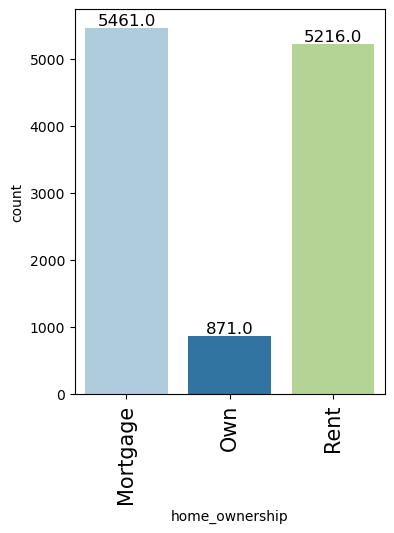

In [19]:
labeled_barplot(loan, "home_ownership")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


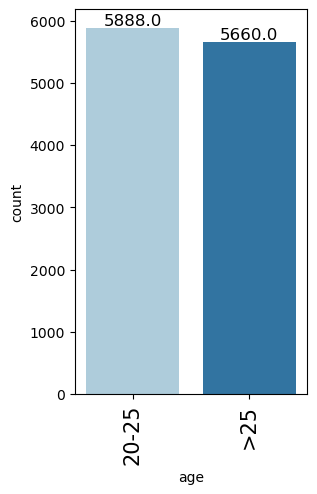

In [20]:
labeled_barplot(loan, "age")

C:\Users\HP\AppData\Local\Temp\ipykernel_23080\2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


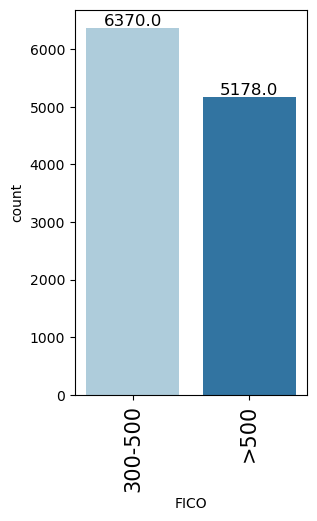

In [21]:
labeled_barplot(loan, "FICO")

In [22]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

isDelinquent     0     1    All
term                           
All           3827  7721  11548
36 months     3168  7421  10589
60 months      659   300    959
------------------------------------------------------------------------------------------------------------------------


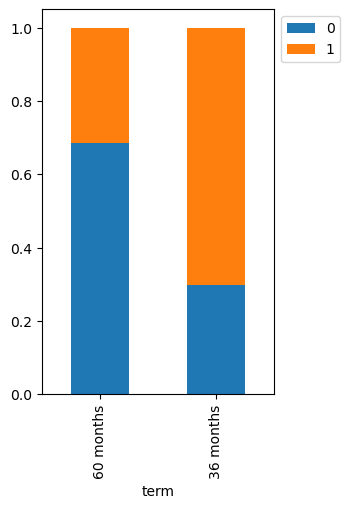

In [23]:
stacked_barplot(loan, "term", "isDelinquent")

isDelinquent     0     1    All
gender                         
All           3827  7721  11548
Male          1977  4578   6555
Female        1850  3143   4993
------------------------------------------------------------------------------------------------------------------------


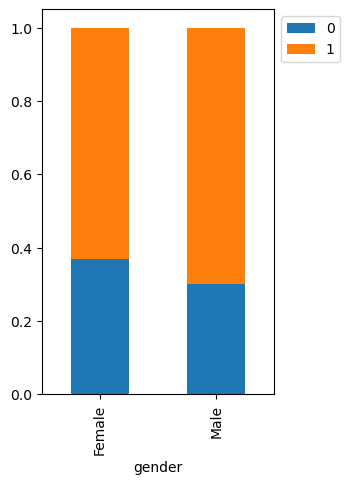

In [24]:
stacked_barplot(loan, "gender", "isDelinquent")

isDelinquent     0     1    All
purpose                        
All           3827  7721  11548
House         2272  4620   6892
Car            678  1402   2080
Other          357   653   1010
Personal       274   618    892
Wedding        139   269    408
Medical        107   159    266
------------------------------------------------------------------------------------------------------------------------


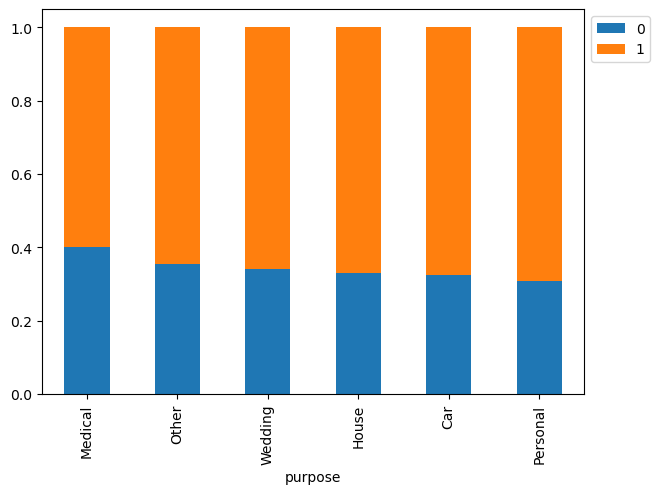

In [25]:
stacked_barplot(loan, "purpose", "isDelinquent")

isDelinquent       0     1    All
home_ownership                   
All             3827  7721  11548
Mortgage        1831  3630   5461
Rent            1737  3479   5216
Own              259   612    871
------------------------------------------------------------------------------------------------------------------------


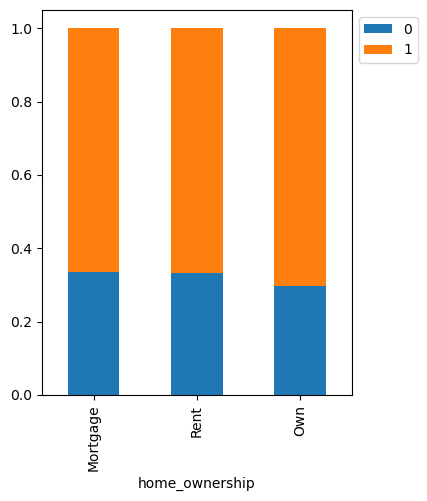

In [26]:
stacked_barplot(loan, "home_ownership", "isDelinquent")

isDelinquent     0     1    All
age                            
All           3827  7721  11548
>25           1969  3691   5660
20-25         1858  4030   5888
------------------------------------------------------------------------------------------------------------------------


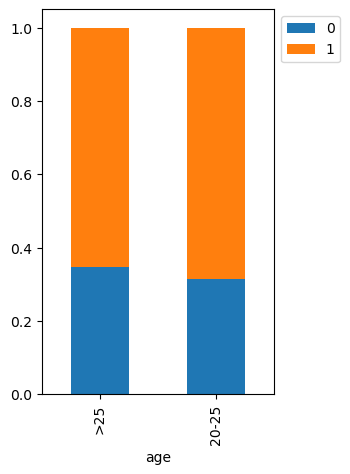

In [27]:
stacked_barplot(loan, "age", "isDelinquent")

isDelinquent     0     1    All
FICO                           
All           3827  7721  11548
>500          2886  2292   5178
300-500        941  5429   6370
------------------------------------------------------------------------------------------------------------------------


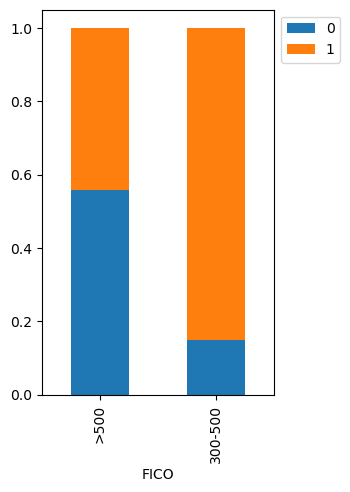

In [28]:
stacked_barplot(loan, "FICO", "isDelinquent")

FICO            300-500  >500    All
home_ownership                      
All                6370  5178  11548
Mortgage           2857  2604   5461
Rent               3033  2183   5216
Own                 480   391    871
------------------------------------------------------------------------------------------------------------------------


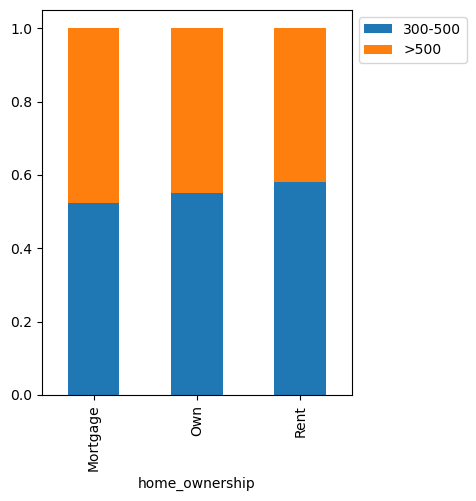

In [29]:
stacked_barplot(loan, "home_ownership", "FICO")

FICO   300-500  >500    All
age                        
All       6370  5178  11548
>25       2443  3217   5660
20-25     3927  1961   5888
------------------------------------------------------------------------------------------------------------------------


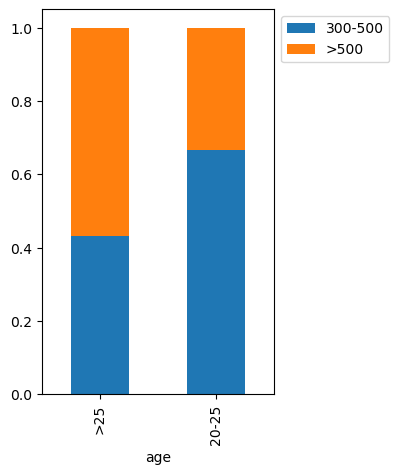

In [30]:
stacked_barplot(loan, "age", "FICO")

FICO    300-500  >500    All
gender                      
All        6370  5178  11548
Male       3705  2850   6555
Female     2665  2328   4993
------------------------------------------------------------------------------------------------------------------------


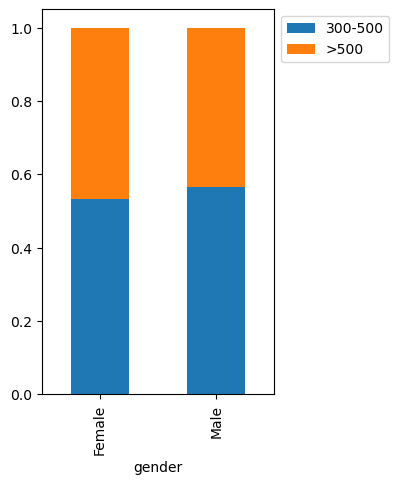

In [31]:
stacked_barplot(loan, "gender", "FICO")

Key Observations
Home_ownership and gender seem to have a slight impact on the FICO scores.
Age seems to have a much bigger impact on FICO scores.
Let us check which of these differences are statistically significant.
The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.

Null Hypothesis - There is no association between the two variables.
Alternate Hypothesis - There is an association between two variables.

In [34]:
crosstab = pd.crosstab(
    loan["FICO"], loan["home_ownership"]
)  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on home ownership"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on home ownership"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on home ownership as the p_value (0.0) < 0.05


In [35]:
crosstab = pd.crosstab(
    loan["FICO"], loan["gender"]
)  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on gender"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on gender"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on gender as the p_value (0.001) < 0.05


In [36]:
crosstab = pd.crosstab(
    loan["FICO"], loan["age"]
)  # Contingency table of region and smoker attributes

Ho = "FICO score has no effect on age"  # Stating the Null Hypothesis
Ha = "FICO score has an effect on age"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

FICO score has an effect on age as the p_value (0.0) < 0.05


Key Observations
P-value for all tests < 0.01. Hence, all the differences that we see in the 3 plots are statistically significant.
There is a correlation between FICO Score and house_ownership. People who have mortgaged their houses have higher FICO scores than people who own the house (peculiar!).
There is a correlation between FICO Score and gender. More females have >500 FICO scores as compared to Males.
There is a correlation between FICO Score and age. People >25 years of age have higher FICO scores as compared to people of age 20-25.